# Joint Angle Calculation & Exploratory Data Analysis

This notebook computes 3D joint angles using a robust `calculate_angle` function and then performs EDA by calculating correlations between these features and multi-class labels.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display plots inline
%matplotlib inline

In [4]:
def calculate_angle(a, b, c):
    """
    Calculates the angle at point b given three 3D points a, b, and c.
    Returns angle in degrees.
    """
    ba = a - b
    bc = c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc) + 1e-8)
    cosine_angle = np.clip(cosine_angle, -1.0, 1.0)
    return np.degrees(np.arccos(cosine_angle))

In [5]:
# Load the bench press pose data
df = pd.read_csv(r"C:\Users\rayaa\OneDrive\Desktop\Sproj_Shoulder\data\benchpress_coords.csv")
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,b_correct_up,0.342405,0.293187,0.615661,0.999998,0.333918,0.293168,0.662415,0.999998,0.334999,...,-0.892839,0.994734,0.979807,0.611790,-0.042018,0.975278,0.725297,0.738664,-1.020206,0.997877
1,b_correct_down,0.347209,0.290651,0.494753,0.999993,0.336074,0.285710,0.560588,0.999994,0.336740,...,-0.707418,0.985596,0.972952,0.608905,-0.118859,0.956751,0.724160,0.736117,-0.862484,0.994825
2,b_correct_down,0.338909,0.297234,0.494922,0.999994,0.325614,0.295111,0.539178,0.999996,0.326345,...,-0.764271,0.978585,0.978824,0.608172,-0.101540,0.941800,0.723257,0.737576,-0.921502,0.993139
3,b_correct_down,0.342315,0.286979,0.466467,0.999992,0.325819,0.285868,0.529371,0.999994,0.325422,...,-0.635539,0.980626,0.981234,0.604804,-0.016468,0.940290,0.719281,0.736312,-0.785139,0.994317
4,b_correct_up,0.337070,0.292075,0.581475,0.999998,0.329630,0.290616,0.630095,0.999999,0.331256,...,-0.825383,0.985708,0.987015,0.609234,-0.114778,0.966898,0.723577,0.738962,-0.948455,0.994775


In [6]:
# Extract 3D coordinates (x, y, z) and class labels
coord_cols = [c for c in df.columns if c[0] in ['x','y','z'] and not c.startswith('v')]
df_coords = df[coord_cols].copy()
df_coords['class'] = df['class']
df_coords.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x31,y31,z31,x32,y32,z32,x33,y33,z33,class
0,0.342405,0.293187,0.615661,0.333918,0.293168,0.662415,0.334999,0.295065,0.662567,0.336077,...,0.635055,0.670979,-0.892839,0.979807,0.611790,-0.042018,0.725297,0.738664,-1.020206,b_correct_up
1,0.347209,0.290651,0.494753,0.336074,0.285710,0.560588,0.336740,0.286097,0.560585,0.337402,...,0.641393,0.669979,-0.707418,0.972952,0.608905,-0.118859,0.724160,0.736117,-0.862484,b_correct_down
2,0.338909,0.297234,0.494922,0.325614,0.295111,0.539178,0.326345,0.295835,0.539164,0.327108,...,0.644981,0.674706,-0.764271,0.978824,0.608172,-0.101540,0.723257,0.737576,-0.921502,b_correct_down
3,0.342315,0.286979,0.466467,0.325819,0.285868,0.529371,0.325422,0.286800,0.529382,0.325121,...,0.642072,0.670213,-0.635539,0.981234,0.604804,-0.016468,0.719281,0.736312,-0.785139,b_correct_down
4,0.337070,0.292075,0.581475,0.329630,0.290616,0.630095,0.331256,0.291665,0.630244,0.332795,...,0.642835,0.673641,-0.825383,0.987015,0.609234,-0.114778,0.723577,0.738962,-0.948455,b_correct_up


In [7]:
# Compute joint angles row-wise
joint_ids = {
    'left_elbow': (15, 13, 11),
    'right_elbow': (16, 14, 12),
    'left_shoulder': (13, 11, 23),
    'right_shoulder': (14, 12, 24),
    'left_knee': (27, 25, 23),
    'right_knee': (28, 26, 24)
}
df_angles = pd.DataFrame(index=df_coords.index)
for name, (a, b, c) in joint_ids.items():
    df_angles[f'{name}_angle'] = df_coords.apply(
        lambda row: calculate_angle(
            np.array([row[f'x{a}'], row[f'y{a}'], row[f'z{a}']]),
            np.array([row[f'x{b}'], row[f'y{b}'], row[f'z{b}']]),
            np.array([row[f'x{c}'], row[f'y{c}'], row[f'z{c}']])
        ),
        axis=1
    )
df_angles.head()

,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_knee_angle,right_knee_angle
0,155.829063,161.920910,23.171719,125.226992,127.353077,36.806798
1,154.619283,138.610598,27.678764,103.665383,144.719684,44.077452
2,163.594116,147.676605,21.102228,120.954584,109.685019,39.804694
3,155.346918,112.358555,27.230365,94.812442,126.956354,46.305354
4,154.454148,145.625799,25.099893,129.222059,126.102640,39.764947


In [8]:
# Derive form-related features
# Elbow flare
for side, (a, b, c) in [('left', (13, 11, 15)), ('right', (14, 12, 16))]:
    df_angles[f'{side}_elbow_flare'] = (
        np.abs(df_coords[f'x{a}'] - df_coords[f'x{b}']) -
        np.abs(df_coords[f'x{c}'] - df_coords[f'x{b}'])
    )
# Wrist stacking (using y & z distances)
for side, (c, e) in [('left', (15, 13)), ('right', (16, 14))]:
    df_angles[f'{side}_wrist_stack_diff'] = np.sqrt(
        (df_coords[f'y{c}'] - df_coords[f'y{e}'])**2 +
        (df_coords[f'z{c}'] - df_coords[f'z{e}'])**2
    )
# Shoulder stability
df_angles['shoulder_diff_3d'] = np.sqrt(
    (df_coords['y12'] - df_coords['y11'])**2 +
    (df_coords['z12'] - df_coords['z11'])**2
)
# Asymmetry features
df_angles['elbow_angle_asym'] = np.abs(df_angles['left_elbow_angle'] - df_angles['right_elbow_angle'])
df_angles['shoulder_angle_asym'] = np.abs(df_angles['left_shoulder_angle'] - df_angles['right_shoulder_angle'])
df_angles.head()

,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_knee_angle,right_knee_angle,left_elbow_flare,right_elbow_flare,left_wrist_stack_diff,right_wrist_stack_diff,shoulder_diff_3d,elbow_angle_asym,shoulder_angle_asym
0,155.829063,161.920910,23.171719,125.226992,127.353077,36.806798,0.007993,-0.034835,0.343165,0.108309,0.353820,6.091848,102.055274
1,154.619283,138.610598,27.678764,103.665383,144.719684,44.077452,-0.039567,-0.083237,0.289852,0.028476,0.313675,16.008685,75.986619
2,163.594116,147.676605,21.102228,120.954584,109.685019,39.804694,-0.053491,-0.020218,0.292091,0.130633,0.235194,15.917511,99.852356
3,155.346918,112.358555,27.230365,94.812442,126.956354,46.305354,-0.029823,-0.108165,0.326045,0.099072,0.319935,42.988363,67.582077
4,154.454148,145.625799,25.099893,129.222059,126.102640,39.764947,-0.001489,-0.018972,0.340309,0.095232,0.367216,8.828349,104.122166


In [9]:
# Combine angles and class labels
features = df_angles.copy()
features['class'] = df_coords['class']
features.head()

,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_knee_angle,right_knee_angle,left_elbow_flare,right_elbow_flare,left_wrist_stack_diff,right_wrist_stack_diff,shoulder_diff_3d,elbow_angle_asym,shoulder_angle_asym,class
0,155.829063,161.920910,23.171719,125.226992,127.353077,36.806798,0.007993,-0.034835,0.343165,0.108309,0.353820,6.091848,102.055274,b_correct_up
1,154.619283,138.610598,27.678764,103.665383,144.719684,44.077452,-0.039567,-0.083237,0.289852,0.028476,0.313675,16.008685,75.986619,b_correct_down
2,163.594116,147.676605,21.102228,120.954584,109.685019,39.804694,-0.053491,-0.020218,0.292091,0.130633,0.235194,15.917511,99.852356,b_correct_down
3,155.346918,112.358555,27.230365,94.812442,126.956354,46.305354,-0.029823,-0.108165,0.326045,0.099072,0.319935,42.988363,67.582077,b_correct_down
4,154.454148,145.625799,25.099893,129.222059,126.102640,39.764947,-0.001489,-0.018972,0.340309,0.095232,0.367216,8.828349,104.122166,b_correct_up


In [10]:
# One-hot encode classes and compute correlation matrix
dummies = pd.get_dummies(features['class'], prefix='class')
corr_df = pd.concat([features.drop(columns=['class']), dummies], axis=1).corr().loc[features.columns.drop('class'), dummies.columns]
corr_df

,class_b_arms_spread_down,class_b_arms_spread_up,class_b_correct_down,class_b_correct_up,class_b_excessive_arch_down,class_b_excessive_arch_up
left_elbow_angle,0.343420,0.017688,0.155429,-0.022923,-0.091571,-0.400966
right_elbow_angle,-0.001695,-0.066005,0.142125,0.141671,-0.122805,-0.075221
left_shoulder_angle,-0.225802,-0.080070,-0.202874,-0.083069,0.153633,0.419514
right_shoulder_angle,0.183221,0.239087,0.006336,0.149184,-0.387372,-0.172563
left_knee_angle,-0.099903,0.157840,-0.168051,0.201288,-0.227864,0.152023
right_knee_angle,0.158858,0.305265,-0.123924,0.068169,-0.150270,-0.249532
left_elbow_flare,-0.263995,-0.082080,0.018467,0.221363,-0.017498,0.147151
right_elbow_flare,-0.350348,-0.038645,-0.114038,0.195941,0.043117,0.280958
left_wrist_stack_diff,0.079007,-0.089561,0.126967,-0.051068,0.138410,-0.204529
right_wrist_stack_diff,-0.121109,0.018588,0.026735,0.208859,-0.038800,-0.069588


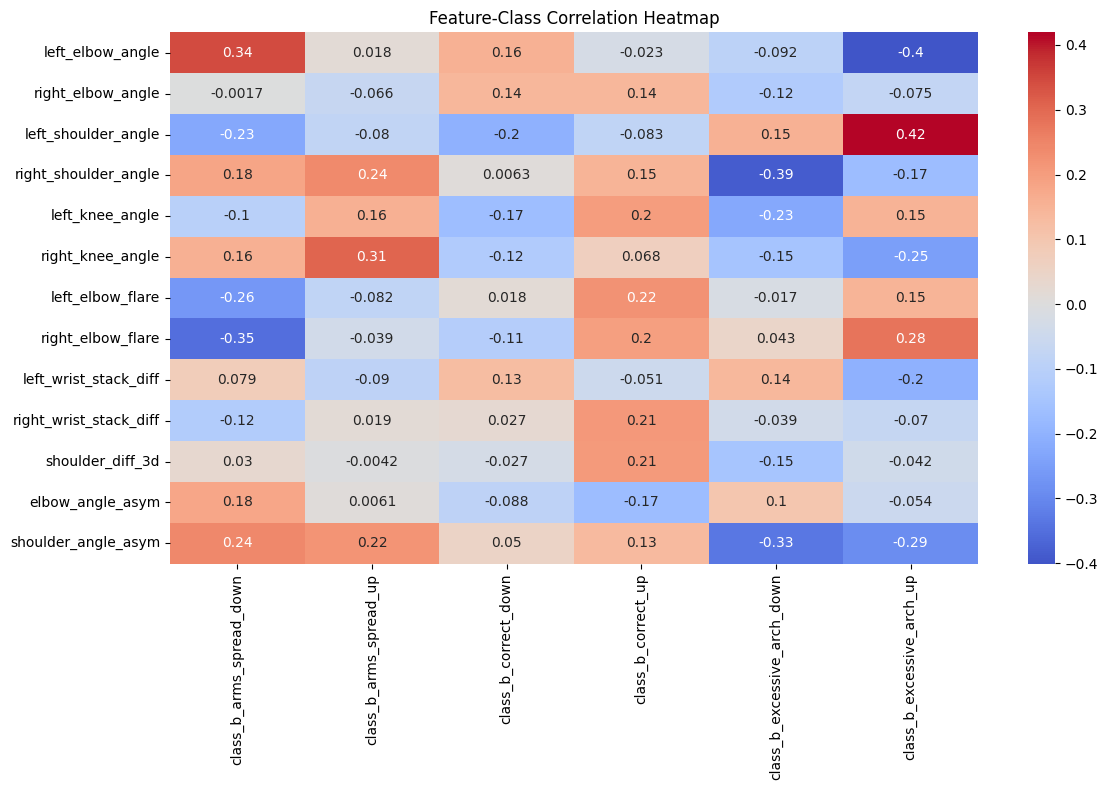

<Figure size 640x480 with 0 Axes>

In [11]:
# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0)
plt.title('Feature-Class Correlation Heatmap')
plt.tight_layout()
plt.show()
plt.savefig("heatmap.png",   # filename (change extension to .pdf or .svg for vector)
            dpi=300,         # dots per inch; higher = sharper
            bbox_inches="tight",  # trim extra whitespace
            transparent=False)    # True → transparent background



In [12]:
# Save correlations to CSV
corr_df.to_csv('angle_class_correlations.csv')
print('Saved correlation matrix to angle_class_correlations.csv')

Saved correlation matrix to angle_class_correlations.csv
